# Random Number Generator

### Step 1. Map the problem

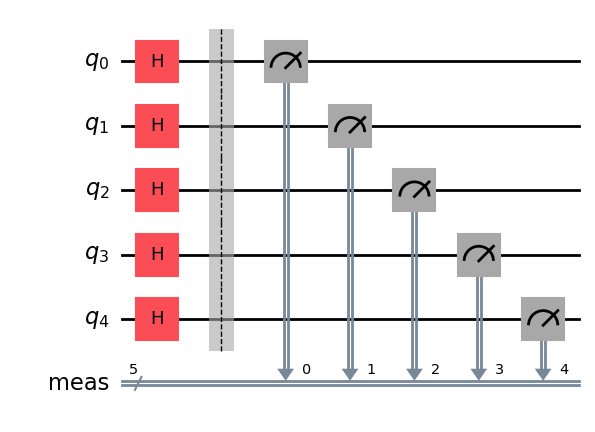

In [20]:
from qiskit import QuantumCircuit

# Create a new circuit with 5 qubits
qc = QuantumCircuit(5)

# Add a Hadamard gate to all 5 qubits
for i in range(qc.width()):
    qc.h(i)

qc.measure_all()
qc.draw("mpl")

In [21]:
##Understanding Pauli strings/matrices
from qiskit.quantum_info import SparsePauliOp

#each letter represents a qubit, Z refers to phase-flip If |0>, stays as |0>, if |1>, changes to -|1>
operator = ['ZZZZZ'] #I could've used 'XXXXX', 'YYYYY' or a mix of them, result would still be a random string of 1 and 0 concatenated
print(operator)

operators = [SparsePauliOp(o) for o in operator]

['ZZZZZ']


### Step 2. Optimize

In reality, this step is not needed for this project since we really don't mind if our qubits get messed up by noise, we still get a random result with or without noise. Still included this step just for learning, this is strictly a default optimization.

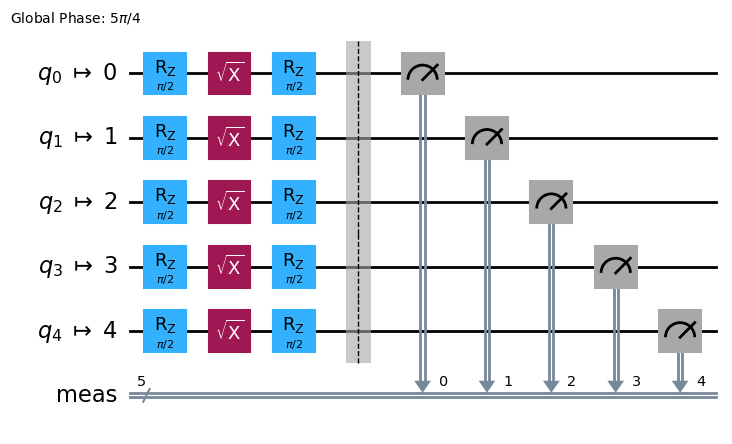

In [39]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

service = QiskitRuntimeService()

simulator = FakeManilaV2()
# backend = service.backend(name='ibm_brisbane')

pm = generate_preset_pass_manager(backend=simulator, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

### Step 3. Execute with quantum primitives

In [40]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=simulator)
# Sampler is needed for the bitstring result, Estimator would give us
job = sampler.run([isa_circuit], shots=10)

# mapped_observables = [
#     observable.apply_layout(isa_circuit.layout) for observable in operators
# ]

print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d3ce01d4-d50c-43d9-96e7-8b9fb6af9240


c:\Users\delbr\OneDrive\Documents\Quantum_Learning\.conda\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  qubits = (qubit,)


In [44]:
job_result = job.result()

pub_result = job.result()[0]
print(f"pub_result contains: {pub_result.data}")
print(f"num shots: {pub_result.data.meas.num_shots}")
print(f"num bits: {pub_result.data.meas.num_bits}")

pub_result contains: DataBin(meas=BitArray(<shape=(), num_shots=10, num_bits=5>))
num shots: 10
num bits: 5


### Step 4. Analyze the results

In [47]:
from matplotlib import pyplot as plt

result = pub_result.data.meas
print(result.get_counts()) 

{'11101': 1, '00010': 1, '10111': 1, '00110': 1, '01010': 1, '01100': 1, '10010': 1, '00001': 1, '01111': 1, '01001': 1}


## TODO: 
- We can reduce number of shots, to 1 and choose it as our random number or increase number of shots and choose the one bit string that repeats itself the most, and choose that number as the random number to then translate using binary
- Clean up code/comments and properly put in-line document